=== Бизнес-инсайты и рекомендации ===

1. Загрузка данных...
✅ Данные загружены: (152842, 21)
✅ Информация о модели загружена

2. Базовый анализ конверсий...
📊 Общий Conversion Rate: 0.6729 (67.29%)
📈 Всего конверсий: 102,842
👥 Всего сессий: 152,842

3. Анализ по ключевым сегментам...

🎯 UTM_SOURCE_TYPE:
                 sessions  conversions  conversion_rate
utm_source_type                                        
unknown                12           10           0.8333
social              11935         8117           0.6801
other              140895        94715           0.6722

🎯 DEVICE_CATEGORY:
                 sessions  conversions  conversion_rate
device_category                                        
mobile             113875        76834           0.6747
desktop             37711        25243           0.6694
tablet               1256          765           0.6091

🎯 OS_TYPE:
         sessions  conversions  conversion_rate
os_type                                        
unknow

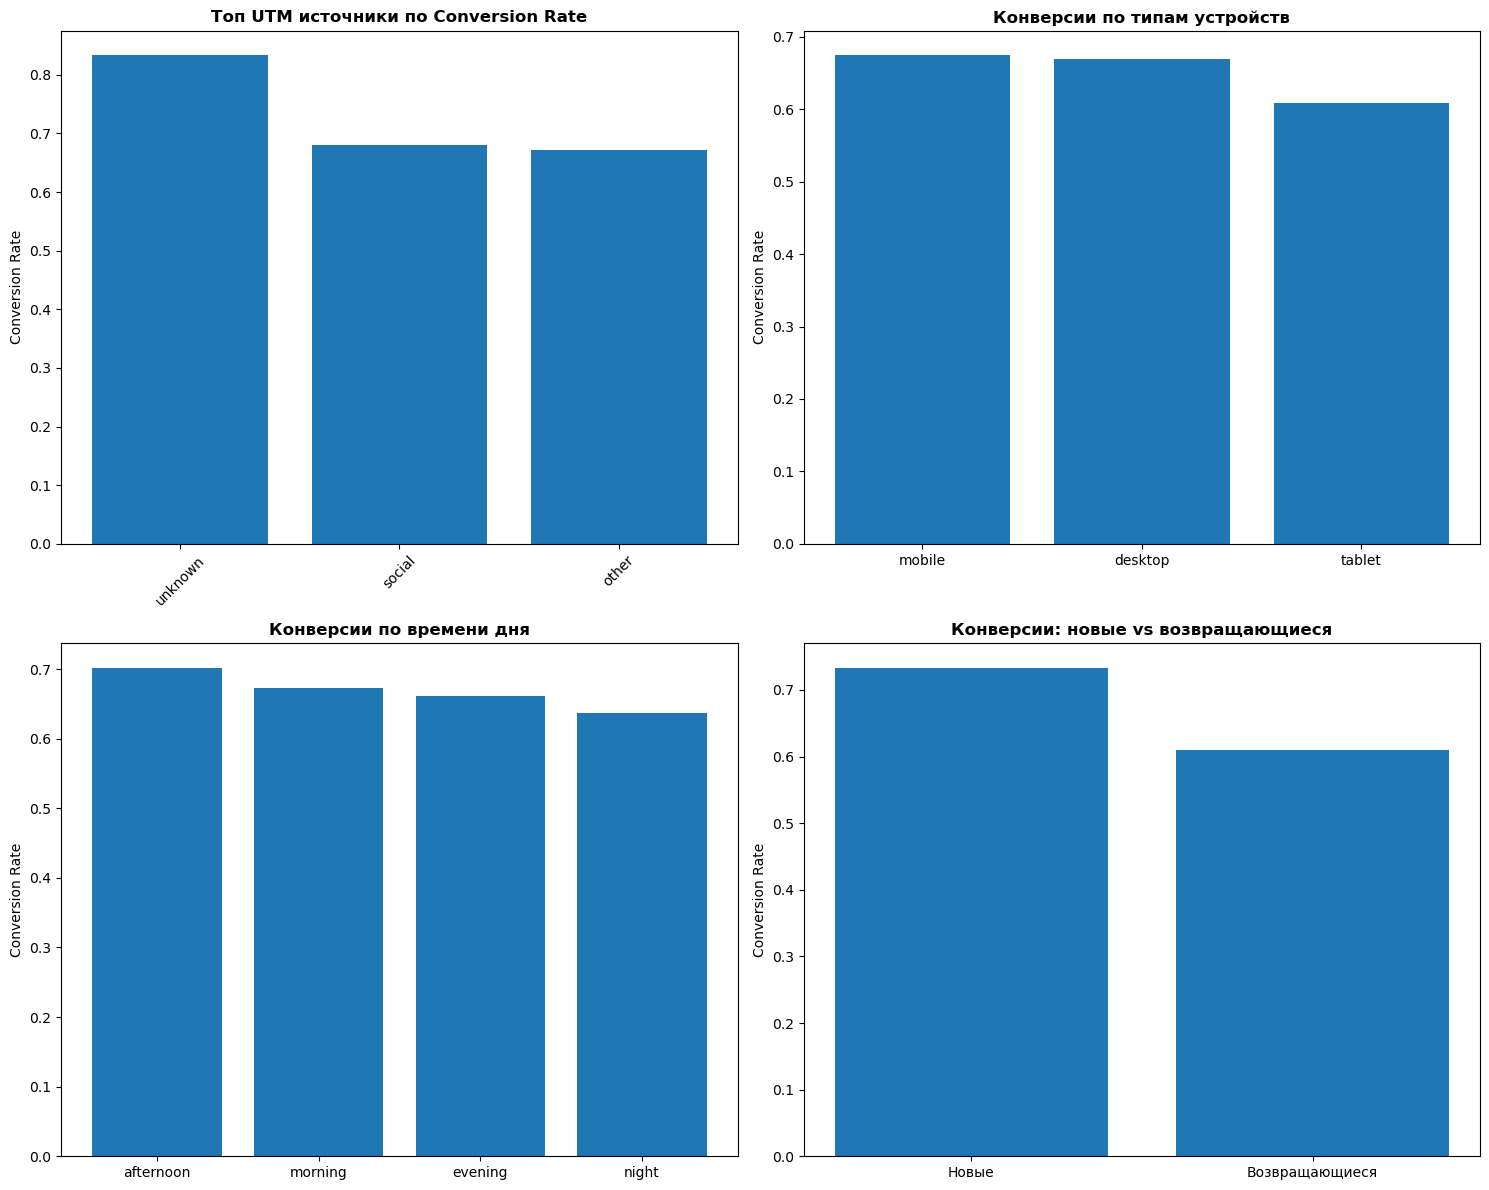


5. Рекомендации для маркетинга:
🎯 High-performing UTM источники (топ 25% по CR):
   • unknown: CR = 0.8333, Сессий = 12

⏰ Лучшее время для конверсий:
   • afternoon: CR = 0.7019
   • morning: CR = 0.6721

📱 Топ 3 типа устройств по конверсиям:
   • mobile: CR = 0.6747, Сессий = 113875
   • desktop: CR = 0.6694, Сессий = 37711
   • tablet: CR = 0.6091, Сессий = 1256

7. ROI анализ...
💵 Предположения для ROI анализа:
   • Средняя стоимость клика (CPC): 15 руб
   • Средний доход с конверсии: 5000 руб

📈 ROI анализ по UTM источникам:
                 sessions  conversions  conversion_rate        cpa         roi
utm_source_type                                                               
unknown                12           10           0.8333  18.000000  276.777778
social              11935         8117           0.6801  22.055562  225.700182
other              140895        94715           0.6722  22.313520  223.079397

ФИНАЛЬНЫЕ БИЗНЕС-РЕКОМЕНДАЦИИ

🎯 ПРИОРИТЕТНЫЕ ДЕЙСТВИЯ:
1. Увеличит

In [4]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

print("=== Бизнес-инсайты и рекомендации ===\n")

# 1. Загрузка данных
print("1. Загрузка данных...")

try:
    # Используем сэмпл для анализа
    data = pd.read_csv('model_data_sample.csv')
    print(f"✅ Данные загружены: {data.shape}")
except FileNotFoundError:
    print("❌ Файл model_data_sample.csv не найден")
    raise

# Загрузка информации о модели
try:
    feature_info = joblib.load('models/feature_info.pkl')
    print("✅ Информация о модели загружена")
except:
    print("⚠️ Не удалось загрузить информацию о модели")

# 2. Базовый анализ конверсий
print("\n2. Базовый анализ конверсий...")

cr = data['target'].mean()
print(f"📊 Общий Conversion Rate: {cr:.4f} ({cr*100:.2f}%)")
print(f"📈 Всего конверсий: {data['target'].sum():,}")
print(f"👥 Всего сессий: {len(data):,}")

# 3. Анализ по ключевым сегментам
print("\n3. Анализ по ключевым сегментам...")

def analyze_segment(data, segment_column, top_n=5):
    """Анализ конверсий по сегменту"""
    if segment_column not in data.columns:
        return None
    
    analysis = data.groupby(segment_column).agg({
        'target': ['count', 'sum', 'mean']
    }).round(4)
    analysis.columns = ['sessions', 'conversions', 'conversion_rate']
    return analysis.sort_values('conversion_rate', ascending=False).head(top_n)

# Анализ по основным сегментам
segments_to_analyze = [
    'utm_source_type', 'device_category', 'os_type', 
    'time_of_day', 'country_region', 'is_returning_user'
]

for segment in segments_to_analyze:
    result = analyze_segment(data, segment)
    if result is not None:
        print(f"\n🎯 {segment.upper()}:")
        print(result)

# 4. Визуализация ключевых инсайтов
print("\n4. Визуализация ключевых инсайтов...")

os.makedirs('plots', exist_ok=True)

# Создаем subplots для основных метрик
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 4.1. Top UTM sources by CR
utm_analysis = analyze_segment(data, 'utm_source_type', 5)
if utm_analysis is not None:
    axes[0, 0].bar(range(len(utm_analysis)), utm_analysis['conversion_rate'])
    axes[0, 0].set_title('Топ UTM источники по Conversion Rate', fontweight='bold')
    axes[0, 0].set_ylabel('Conversion Rate')
    axes[0, 0].set_xticks(range(len(utm_analysis)))
    axes[0, 0].set_xticklabels(utm_analysis.index, rotation=45)

# 4.2. Device performance
device_analysis = analyze_segment(data, 'device_category')
if device_analysis is not None:
    axes[0, 1].bar(range(len(device_analysis)), device_analysis['conversion_rate'])
    axes[0, 1].set_title('Конверсии по типам устройств', fontweight='bold')
    axes[0, 1].set_ylabel('Conversion Rate')
    axes[0, 1].set_xticks(range(len(device_analysis)))
    axes[0, 1].set_xticklabels(device_analysis.index)

# 4.3. Time performance
time_analysis = analyze_segment(data, 'time_of_day')
if time_analysis is not None:
    axes[1, 0].bar(range(len(time_analysis)), time_analysis['conversion_rate'])
    axes[1, 0].set_title('Конверсии по времени дня', fontweight='bold')
    axes[1, 0].set_ylabel('Conversion Rate')
    axes[1, 0].set_xticks(range(len(time_analysis)))
    axes[1, 0].set_xticklabels(time_analysis.index)

# 4.4. Returning users
returning_analysis = analyze_segment(data, 'is_returning_user')
if returning_analysis is not None:
    axes[1, 1].bar(['Новые', 'Возвращающиеся'], returning_analysis['conversion_rate'])
    axes[1, 1].set_title('Конверсии: новые vs возвращающиеся', fontweight='bold')
    axes[1, 1].set_ylabel('Conversion Rate')

plt.tight_layout()
plt.savefig('plots/business_insights_final.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Рекомендации для маркетинга
print("\n5. Рекомендации для маркетинга:")

# Фокус на high-performing источники
if utm_analysis is not None and len(utm_analysis) > 0:
    high_performing_sources = utm_analysis[utm_analysis['conversion_rate'] > utm_analysis['conversion_rate'].quantile(0.75)]
    print("🎯 High-performing UTM источники (топ 25% по CR):")
    for source in high_performing_sources.index:
        cr = high_performing_sources.loc[source, 'conversion_rate']
        sessions = high_performing_sources.loc[source, 'sessions']
        print(f"   • {source}: CR = {cr:.4f}, Сессий = {sessions}")

# Оптимизация по времени дня
if time_analysis is not None and len(time_analysis) > 0:
    best_times = time_analysis[time_analysis['conversion_rate'] > time_analysis['conversion_rate'].mean()]
    print(f"\n⏰ Лучшее время для конверсий:")
    for time in best_times.index:
        cr = best_times.loc[time, 'conversion_rate']
        print(f"   • {time}: CR = {cr:.4f}")

# Device-specific стратегии
if device_analysis is not None and len(device_analysis) > 0:
    top_devices = device_analysis.head(3)
    print(f"\n📱 Топ 3 типа устройств по конверсиям:")
    for device in top_devices.index:
        cr = top_devices.loc[device, 'conversion_rate']
        sessions = top_devices.loc[device, 'sessions']
        print(f"   • {device}: CR = {cr:.4f}, Сессий = {sessions}")

# 6. ROI анализ
print("\n7. ROI анализ...")

# Предположим средние стоимости
avg_cpc = 15  # средняя стоимость клика
avg_revenue_per_conversion = 5000  # средний доход с конверсии

print("💵 Предположения для ROI анализа:")
print(f"   • Средняя стоимость клика (CPC): {avg_cpc} руб")
print(f"   • Средний доход с конверсии: {avg_revenue_per_conversion} руб")

# Анализ по UTM источникам
if utm_analysis is not None:
    conversion_analysis = utm_analysis.copy()
    
    # Расчет метрик ROI
    conversion_analysis['cpc'] = avg_cpc
    conversion_analysis['cost'] = conversion_analysis['sessions'] * avg_cpc
    conversion_analysis['cpa'] = conversion_analysis['cost'] / conversion_analysis['conversions']
    conversion_analysis['cpa'] = conversion_analysis['cpa'].replace([np.inf, -np.inf], np.nan).fillna(0)
    
    conversion_analysis['revenue'] = conversion_analysis['conversions'] * avg_revenue_per_conversion
    conversion_analysis['roi'] = (conversion_analysis['revenue'] - conversion_analysis['cost']) / conversion_analysis['cost']
    
    print("\n📈 ROI анализ по UTM источникам:")
    roi_analysis = conversion_analysis[['sessions', 'conversions', 'conversion_rate', 'cpa', 'roi']].sort_values('roi', ascending=False)
    print(roi_analysis.head(10))

# 8. Финальная сводка рекомендаций
print("\n" + "="*60)
print("ФИНАЛЬНЫЕ БИЗНЕС-РЕКОМЕНДАЦИИ")
print("="*60)

print("\n🎯 ПРИОРИТЕТНЫЕ ДЕЙСТВИЯ:")

if utm_analysis is not None and not utm_analysis.empty:
    best_source = utm_analysis.index[0]
    best_cr = utm_analysis.iloc[0]['conversion_rate']
    print(f"1. Увеличить бюджет на источник: {best_source} (CR: {best_cr:.4f})")

if device_analysis is not None and not device_analysis.empty:
    best_device = device_analysis.index[0]
    best_device_cr = device_analysis.iloc[0]['conversion_rate']
    print(f"2. Оптимизировать под устройство: {best_device} (CR: {best_device_cr:.4f})")

if time_analysis is not None and not time_analysis.empty:
    best_time = time_analysis.index[0]
    best_time_cr = time_analysis.iloc[0]['conversion_rate']
    print(f"3. Сфокусироваться на время: {best_time} (CR: {best_time_cr:.4f})")

print("\n📊 КЛЮЧЕВЫЕ ИНСАЙТЫ:")
print(f"• Всего проанализировано сессий: {len(data):,}")
print(f"• Общий Conversion Rate: {cr:.4f} ({cr*100:.2f}%)")
print(f"• Всего конверсий: {data['target'].sum():,}")

if utm_analysis is not None:
    print(f"• Уникальных UTM источников: {len(utm_analysis)}")

if device_analysis is not None:
    print(f"• Уникальных типов устройств: {len(device_analysis)}")

print(f"\n💾 СОХРАНЕННЫЕ МАТЕРИАЛЫ:")
print(f"• plots/business_insights_final.png - ключевые инсайты")

print(f"\n✅ БИЗНЕС-АНАЛИТИКА ЗАВЕРШЕНА!")
print("="*60)